In [1]:
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline
# ignore warnings
import warnings
warnings.simplefilter("ignore")

## 1. Data

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### Notes on the columns:

`age` = age

`sex` = sex

`cp` = chest pain type (4 values)

`trestbps` = resting blood pressure

`chol` = serum cholestoral in mg/dl

`fbs` = fasting blood sugar > 120 mg/dl

`restecg` = resting electrocardiographic results (values 0,1,2)

`thalach` = maximum heart rate achieved

`exang` = exercise induced angina

`oldpeak` = oldpeak = ST depression induced by exercise relative to rest

`slope` = the slope of the peak exercise ST segment

`ca` = number of major vessels (0-3) colored by flourosopy

`thal` = thal: 0 = NA; 1 = fixed defect; 2 = normal; 3 = reversable defect

`target` = indicator of heart attack, 0 = No heart attack, 1 = heart attack

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Check for missing data

In [6]:
df.isnull().describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303,303,303,303,303,303
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,303,303,303,303,303,303,303,303,303,303,303,303,303,303


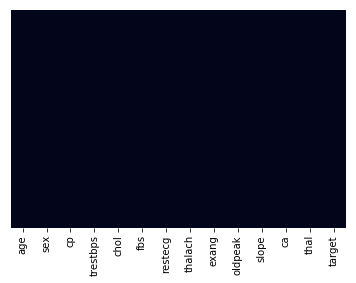

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

Note: a value of 0 in that `thal` column means 'NA', so we must check how many values of 0 are in the `thal` column

In [46]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


We see there are 2 rows out of 303 rows that have missing values. We drop this row.

In [47]:
df = df[df['thal']!= 0]
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.378738,0.684385,0.966777,131.647841,246.504983,0.146179,0.528239,149.740864,0.325581,1.043189,1.398671,0.734219,2.328904,0.544850
std,9.110950,0.465534,1.032259,17.594002,51.915998,0.353874,0.526023,22.891031,0.469372,1.163384,0.616872,1.024268,0.584347,0.498814
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Now we only have 301 rows.

## 2. EDA

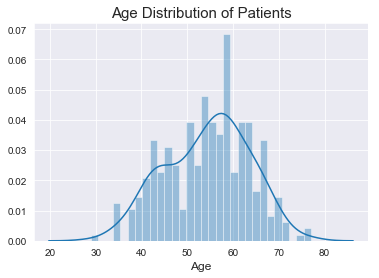

In [48]:
sns.set_style('darkgrid')
sns.distplot(df['age'],bins=30,kde=True)
plt.title('Age Distribution of Patients',size=15)
plt.xlabel('Age',size=12);

- We see that the *Age Distribution of Patients* is roughly normal

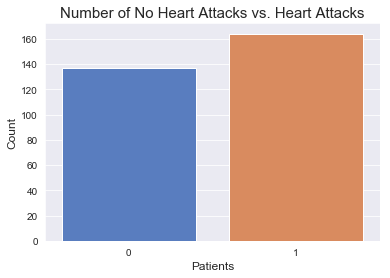

In [49]:
sns.countplot(x='target',data=df,palette='muted')
plt.title('Number of No Heart Attacks vs. Heart Attacks',size=15)
plt.xlabel('Patients',size=12)
plt.ylabel('Count',size=12);

- We see that there were **more patients with heart attacks** than no heart attacks.

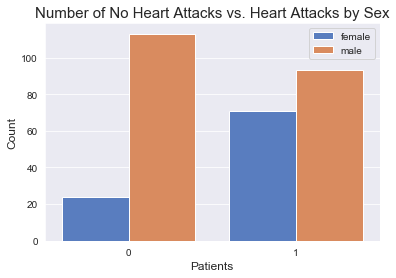

In [50]:
sns.countplot(x='target',data=df,palette='muted',hue='sex')
plt.title('Number of No Heart Attacks vs. Heart Attacks by Sex',size=15)
plt.xlabel('Patients',size=12)
plt.ylabel('Count',size=12)
plt.legend(['female','male']);

- We see that overall, there were **more males** than females in the study.
- **More male patients had heart attacks** than female patients.

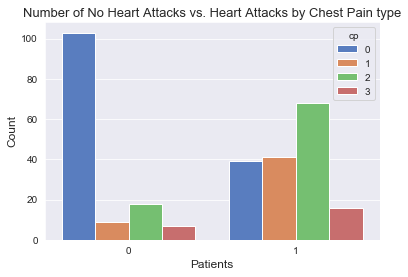

In [51]:
sns.countplot(x='target',data=df,palette='muted',hue='cp')
plt.title('Number of No Heart Attacks vs. Heart Attacks by Chest Pain type',size=13)
plt.xlabel('Patients',size=12)
plt.ylabel('Count',size=12);

- There are four types of chest pains.
- Chest pain **type 0 had less heart attack occurences**. It also had the most patients with no heart attacks.
- Chest pain **type 1 had more heart attack occurences**.
- Chest pain **type 2 also had more heart attack occurences**. It also had the most heart attack occurences.
- Chest pain **type 3 also had more heart attack occurences**. It also had the least heart attack occurences.

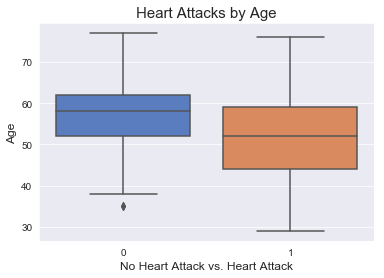

In [52]:
sns.boxplot(x='target',y='age',data=df,palette='muted')
plt.title('Heart Attacks by Age',size=15)
plt.xlabel('No Heart Attack vs. Heart Attack',size=12)
plt.ylabel('Age',size=12);

- Median Age for patients with no heart attacks is **higher**.
- Upper bound of age for patients with heart attacks/ no heart attacks is similar.
- Patients with no heart attacks had much higher age lower bound.

Text(0, 0.5, 'Age')

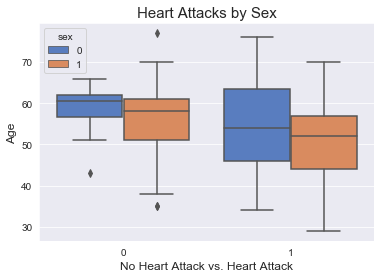

In [53]:
sns.boxplot(x='target',y='age',data=df,palette='muted',hue='sex')
plt.title('Heart Attacks by Sex',size=15)
plt.xlabel('No Heart Attack vs. Heart Attack',size=12)
plt.ylabel('Age',size=12)

- Female patients' median ages were higher for both heart attacks and no heart attacks.
- For those patients that did not have heart attacks, female's age distribution is less stretched compared to that of male's.

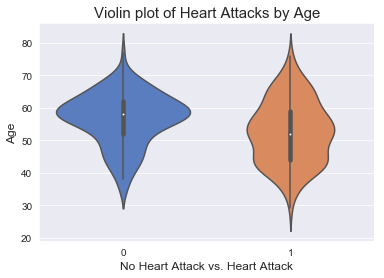

In [54]:
sns.violinplot(x='target',y='age',data=df,palette='muted')
plt.title('Violin plot of Heart Attacks by Age',size=15)
plt.xlabel('No Heart Attack vs. Heart Attack',size=12)
plt.ylabel('Age',size=12);

- There is a high concentration of patients that did not have heart attacks between ages 50 to 70.
- Compared to the plot on the left, the plot on the right is more spread out: Patients that had heart attacks were sparsely distributed between ages 40 to 70.

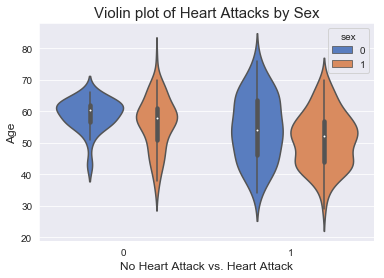

In [55]:
sns.violinplot(x='target',y='age',data=df,palette='muted',hue='sex')
plt.title('Violin plot of Heart Attacks by Sex',size=15)
plt.xlabel('No Heart Attack vs. Heart Attack',size=12)
plt.ylabel('Age',size=12);

- For patients that did not have heart attack, we see that most females are highly concentrated between ages 52 and 68 while males are sparsely distributed among all ages except some concentration between ages 52 and 70.
- For patients that had heart attacks, females were farily sparsely distributed between all age groups. On the other hand, males were concentrated between around ages 38 and 65.

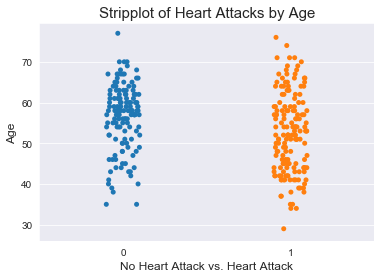

In [56]:
sns.stripplot(x='target',y='age',data=df,jitter=True)
plt.title('Stripplot of Heart Attacks by Age',size=15)
plt.xlabel('No Heart Attack vs. Heart Attack',size=12)
plt.ylabel('Age',size=12);

- There is a rather high concentration of patients without heart attacks between ages 55 and 70 and some concentration between ages 40 to 55.
- Patients that had heart attacks were evenly distributed between ages 40 and 70.

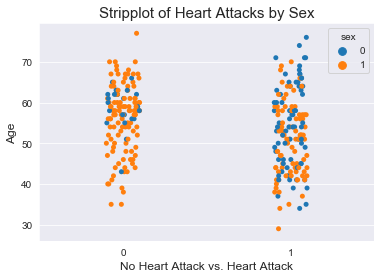

In [58]:
sns.stripplot(x='target',y='age',data=df,jitter=True,hue='sex')
plt.title('Stripplot of Heart Attacks by Sex',size=15)
plt.xlabel('No Heart Attack vs. Heart Attack',size=12)
plt.ylabel('Age',size=12);

- Majority of females had heart attacks.
- Proportion of males that had heart attacks and did not have heart attacks are almost even.

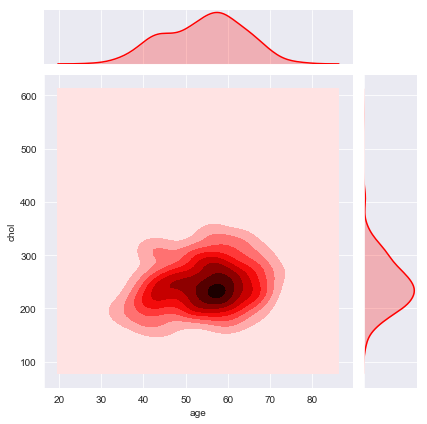

In [65]:
sns.jointplot(x='age',y='chol',data=df,kind='kde',color='red');

 - Most patients that had serum concentration between 200 and 300 mg/dl were aged between 50 and 65.

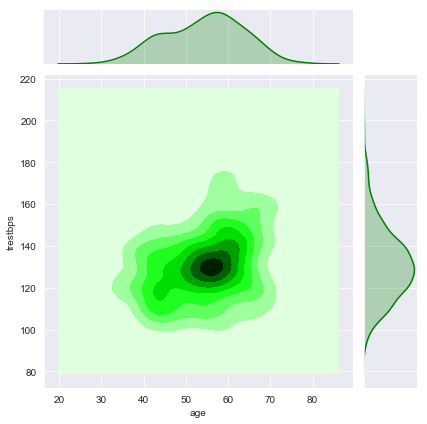

In [66]:
sns.jointplot(x='age',y='trestbps',data=df,kind='kde',color='green')

- Most patients that had resting blood pressure between 120 and 150 were aged between 50 and 65

#### Pairplot

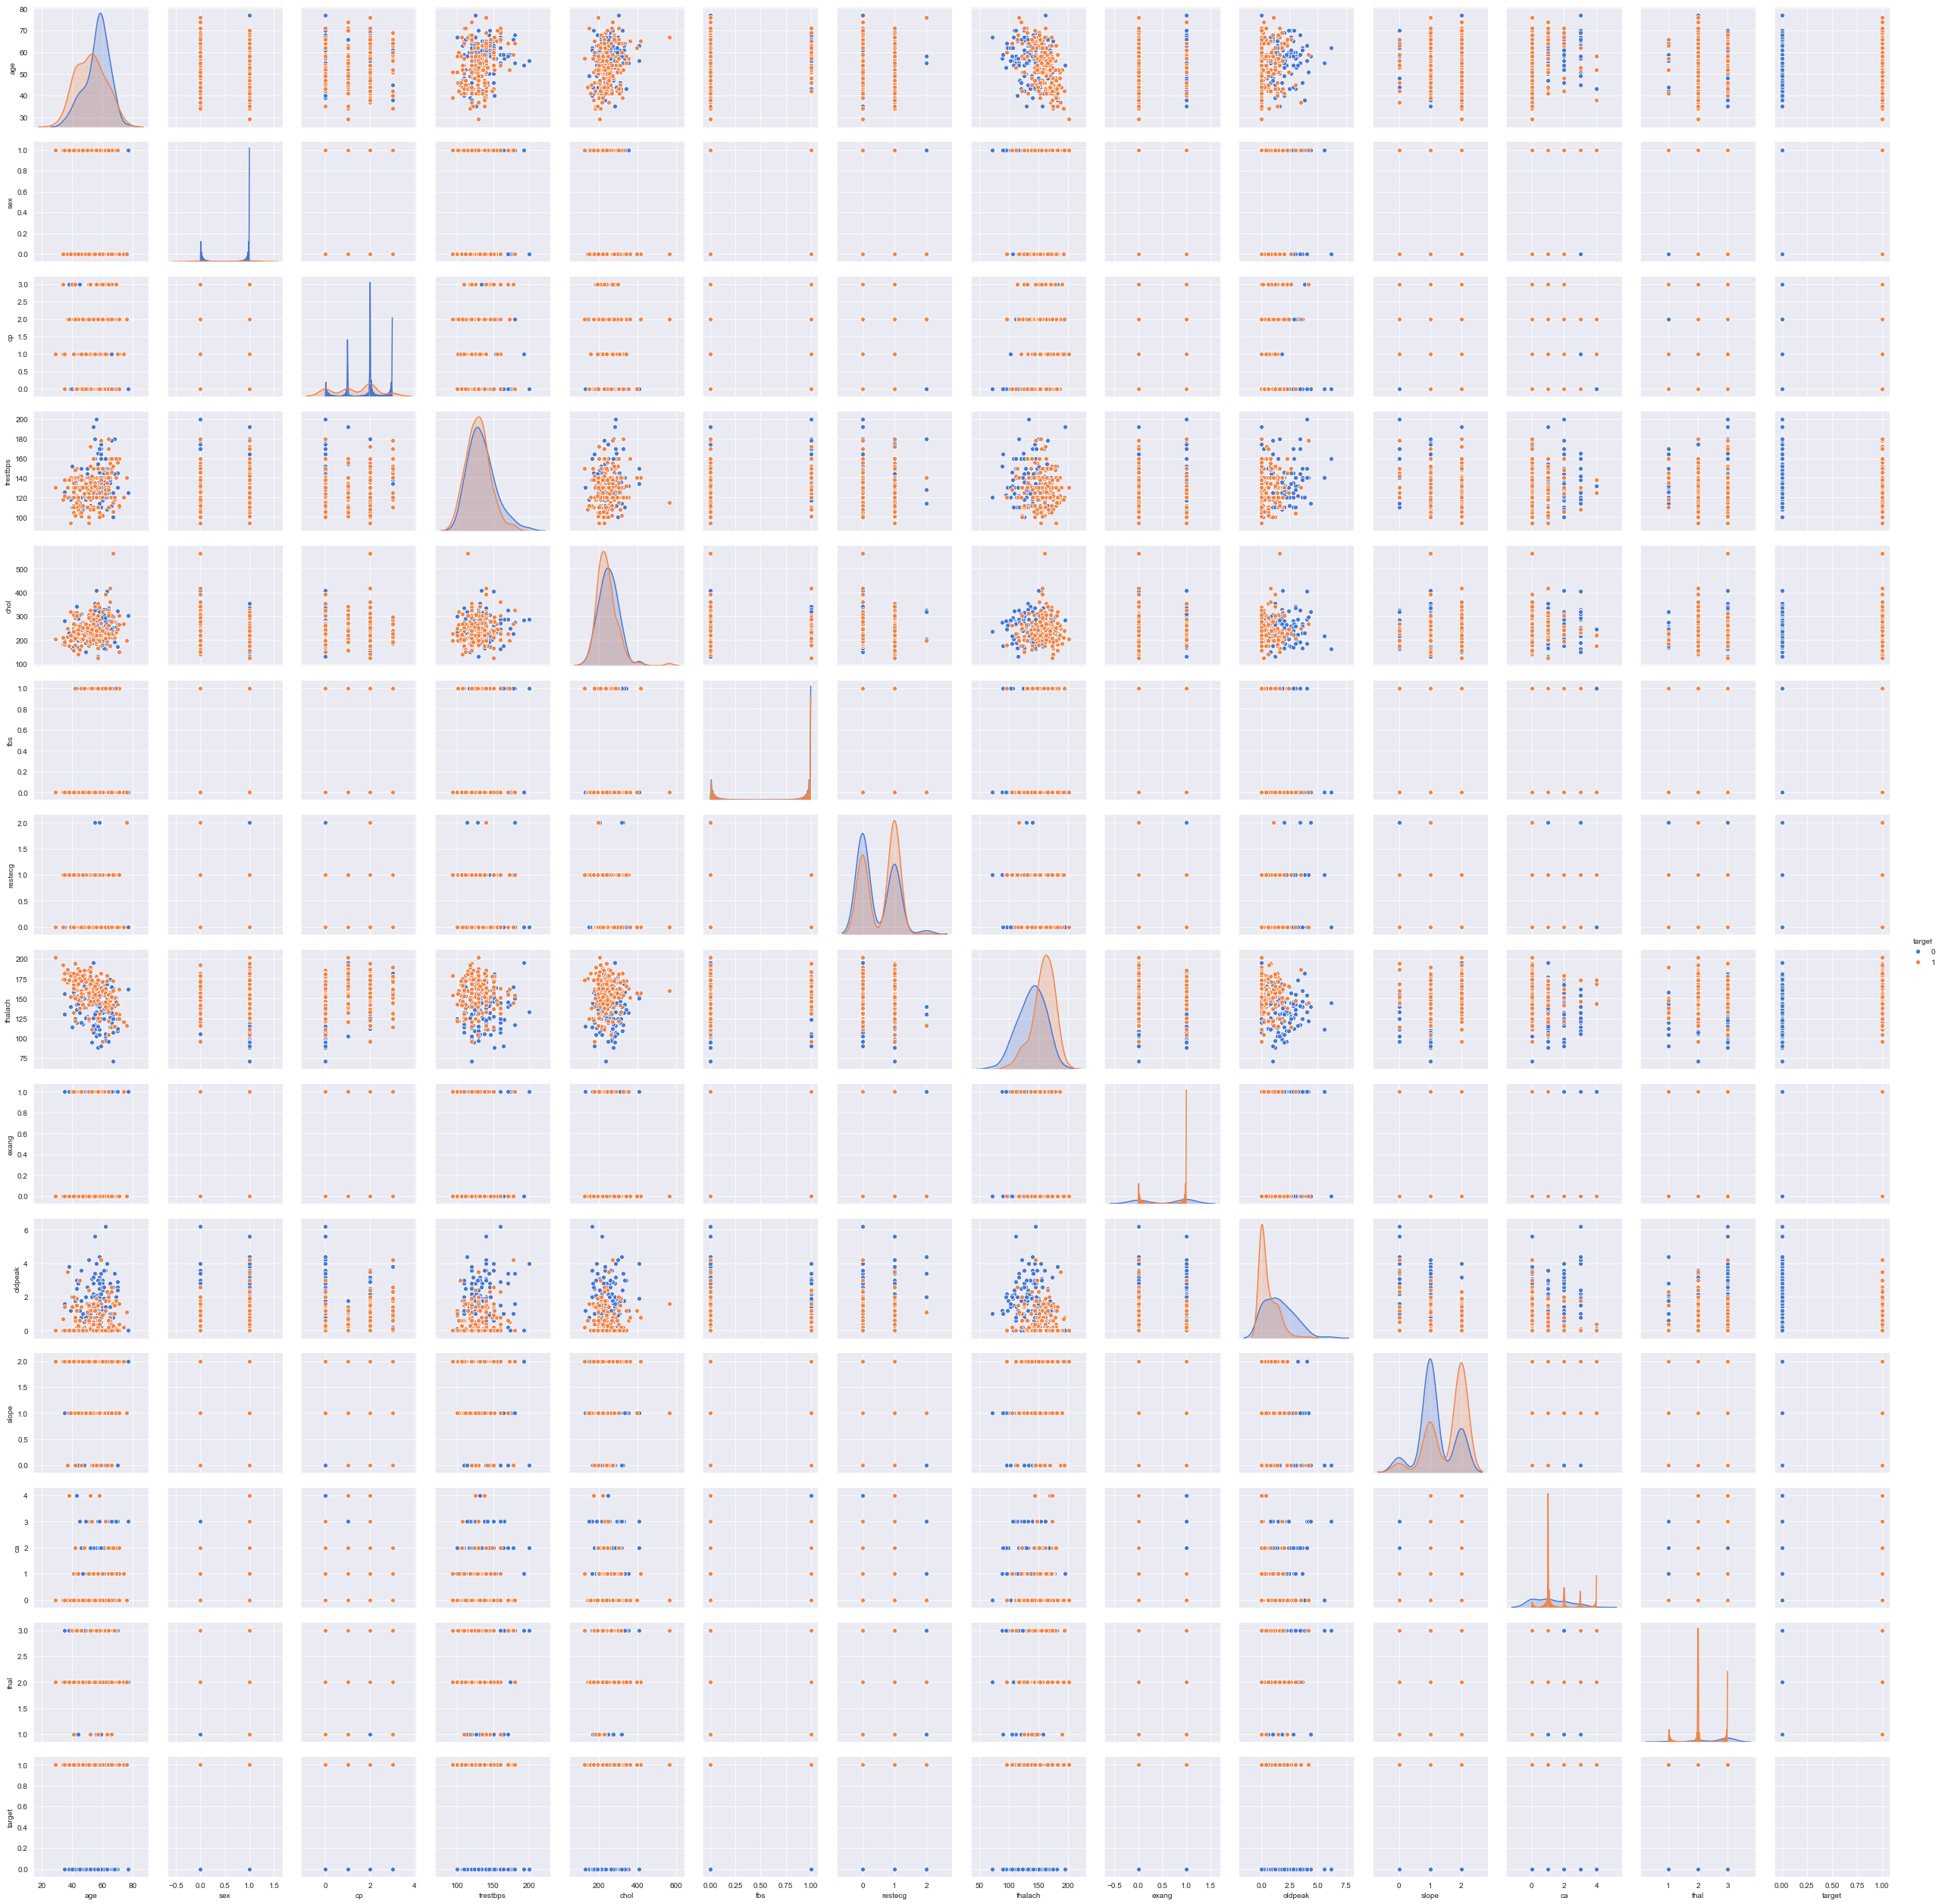

In [61]:
sns.pairplot(df,hue='target',palette='muted');

## Logistic Regression

### Splitting Train and Test data

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [168]:
X = df[df.columns[:-1]]
y = df['target']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [170]:
from sklearn.linear_model import LogisticRegression

### Initialize Model

In [171]:
logmodel = LogisticRegression()

### Fitting train data into model

In [172]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting model

In [173]:
pred = logmodel.predict(X_test)

In [174]:
from sklearn.metrics import classification_report,confusion_matrix

In [175]:
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print('\n')
print('Classification Report: \n',classification_report(y_test,pred))

Confusion Matrix: 
 [[34 12]
 [ 5 40]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        46
           1       0.77      0.89      0.82        45

   micro avg       0.81      0.81      0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



## Decision Tree and Random Forest

### Decision Tree

In [177]:
from sklearn.tree import DecisionTreeClassifier

### Initialize Model

In [178]:
dtree = DecisionTreeClassifier()

### Fitting Model

In [179]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predicting Model

In [180]:
predict = dtree.predict(X_test)

In [181]:
from sklearn.metrics import classification_report,confusion_matrix

In [182]:
print('Confusion Matrix: \n',confusion_matrix(y_test,predict))
print('\n')
print('Classification Report: \n',classification_report(y_test,predict))

Confusion Matrix: 
 [[33 13]
 [10 35]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        46
           1       0.73      0.78      0.75        45

   micro avg       0.75      0.75      0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



### Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier

### Initialize Model

In [185]:
rfc = RandomForestClassifier(n_estimators=600)

### Fitting Model

In [186]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predict Model

In [187]:
predict = rfc.predict(X_test)

In [188]:
print('Confusion Matrix: \n',confusion_matrix(y_test,predict))
print('\n')
print('Classification Report: \n',classification_report(y_test,predict))

Confusion Matrix: 
 [[31 15]
 [ 6 39]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.67      0.75        46
           1       0.72      0.87      0.79        45

   micro avg       0.77      0.77      0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.77      0.77        91



## Comparing Models

### Logistic Regression:

In [176]:
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print('\n')
print('Classification Report: \n',classification_report(y_test,pred))

Confusion Matrix: 
 [[34 12]
 [ 5 40]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        46
           1       0.77      0.89      0.82        45

   micro avg       0.81      0.81      0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



### Decision Tree:

In [183]:
print('Confusion Matrix: \n',confusion_matrix(y_test,predict))
print('\n')
print('Classification Report: \n',classification_report(y_test,predict))

Confusion Matrix: 
 [[33 13]
 [10 35]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        46
           1       0.73      0.78      0.75        45

   micro avg       0.75      0.75      0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



### Random Forest:

In [189]:
print('Confusion Matrix: \n',confusion_matrix(y_test,predict))
print('\n')
print('Classification Report: \n',classification_report(y_test,predict))

Confusion Matrix: 
 [[31 15]
 [ 6 39]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.67      0.75        46
           1       0.72      0.87      0.79        45

   micro avg       0.77      0.77      0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.77      0.77        91



- **Logistic Model had higher weighted average values** compared to both Decision Tree and Random Forest. In fact, all of it's values, precision, recall, f-1 score were greater.
- **Random Forest Model had higher weighted average values** compared to Decision Tree.
- Decision Tree had slightly higher precision value than Random Forest Model for patients that had heart attack. It also had a slightly higher recall value than Random Forest Model for patients that did not have heart attack.